
# Portfolio Analysis Notebook

This notebook replicates the logic from a Streamlit-based portfolio analysis application. 
It walks through each component step-by-step, with explanations, tables, and plots.

---

**Note:** This version is adapted for Jupyter notebooks. UI elements like buttons or input forms have been removed. Instead, values are assigned directly for demonstration purposes.


In [ ]:
%matplotlib inline

from datetime import datetime, timedelta

# Import core functions from project modules (ensure the project is in PYTHONPATH or use relative imports)
from config.config import HISTORICAL_PERIOD_DAYS, BENCHMARK_TICKER, PORTFOLIO_EVOLUTION_YEARS
from data.data_loader import get_historical_prices, get_daily_returns, get_benchmark_data
from calculations.portfolio_calculations import (
    get_portfolio_returns, calculate_risk_parity_weights, 
    calculate_beta, calculate_beta_weights
)
from calculations.optimization import calculate_sharpe_ratio_optimization, calculate_markowitz_optimization
from visualization.visualization import (
    create_pie_chart, plot_historical_prices, plot_daily_returns,
    plot_portfolio_returns, plot_portfolio_evolution, plot_sharpe_ratio_scatter,
    plot_efficient_frontier
)
from analysis.portfolio_analyzer import PortfolioAnalyzer



## Step 1: Define Portfolio Inputs

We'll simulate the user input that was previously collected through Streamlit inputs.


In [2]:

# Simulated user portfolio (example)
amount = 10000  # Total investment amount

# User's tickers and their allocations (as percentages)
ticker_percentage = {
    'AAPL': 0.4,
    'MSFT': 0.3,
    'GOOGL': 0.3
}

tickers = list(ticker_percentage.keys())
weights = list(ticker_percentage.values())
num_tickers = len(tickers)


## Step 2: Define Date Range

We define the historical period over which we want to analyze the portfolio.
This is typically a fixed number of days (e.g., 365), retrieved from the configuration.
It is used to fetch historical price data for the selected stocks.

In [3]:

end_date = datetime.today().date()
start_date = end_date - timedelta(days=HISTORICAL_PERIOD_DAYS)
print(f"Date Range: {start_date} to {end_date}")


Date Range: 2024-06-29 to 2025-06-29


## Step 3: Load Historical Prices

We fetch historical price data for the user-selected stocks over the defined time range.
This data will be used to compute returns and other statistical metrics necessary for optimization and analysis.

In [4]:

prices = get_historical_prices(tickers, start_date, end_date)
prices.head()


[*********************100%***********************]  3 of 3 completed


Ticker,GOOGL,MSFT,AAPL
Date,,,
2024-07-01,182.107849,453.254913,215.741043
2024-07-02,184.347015,455.785492,219.244659
2024-07-03,184.924210,457.264160,220.518707
2024-07-05,189.681168,464.002502,225.286392
2024-07-08,188.118744,462.692566,226.759521


## Step 4: Plot Historical Prices

This plot visually represents how each stock's price has changed over the past year.
It helps understand the volatility and trend of individual assets within the portfolio.

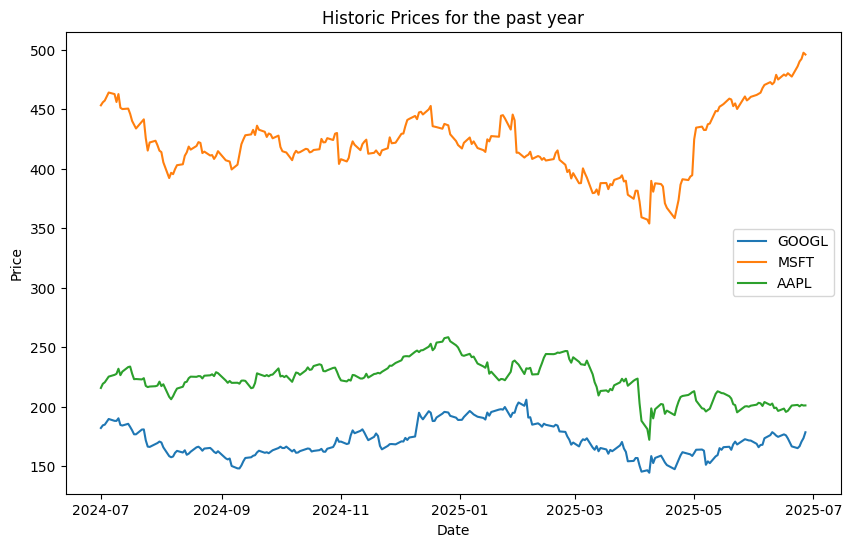

In [5]:

plot_historical_prices(prices)


## Step 5: Calculate Daily Returns

We calculate the daily percentage returns of each stock using their historical prices.
These returns are essential for computing the portfolio return, risk, Sharpe ratio, beta, and for optimization techniques.

In [6]:

daily_returns = get_daily_returns(prices)
daily_returns.head()


Ticker,GOOGL,MSFT,AAPL
Date,,,
2024-07-01,NaN,NaN,NaN
2024-07-02,0.012296,0.005583,0.016240
2024-07-03,0.003131,0.003244,0.005811
2024-07-05,0.025724,0.014736,0.021620
2024-07-08,-0.008237,-0.002823,0.006539


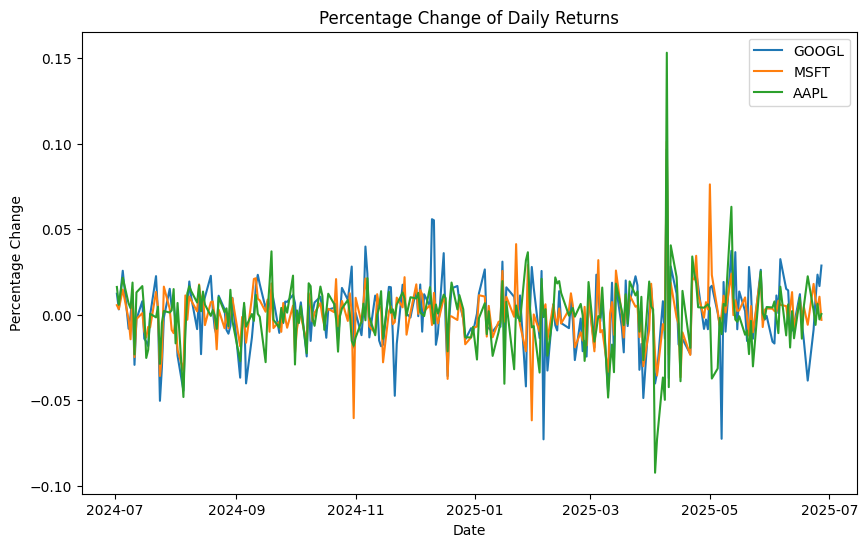

In [7]:

plot_daily_returns(daily_returns)


## Step 6: Portfolio Daily Returns

Here, we calculate the daily return of the entire portfolio using the user-defined weights.
This helps assess the overall portfolio's performance and is used for further analysis.

In [8]:

port_daily_return = get_portfolio_returns(weights, daily_returns)
port_daily_return.head()


Date
2024-07-01         NaN
2024-07-02    0.011465
2024-07-03    0.003969
2024-07-05    0.021196
2024-07-08   -0.002180
dtype: float64

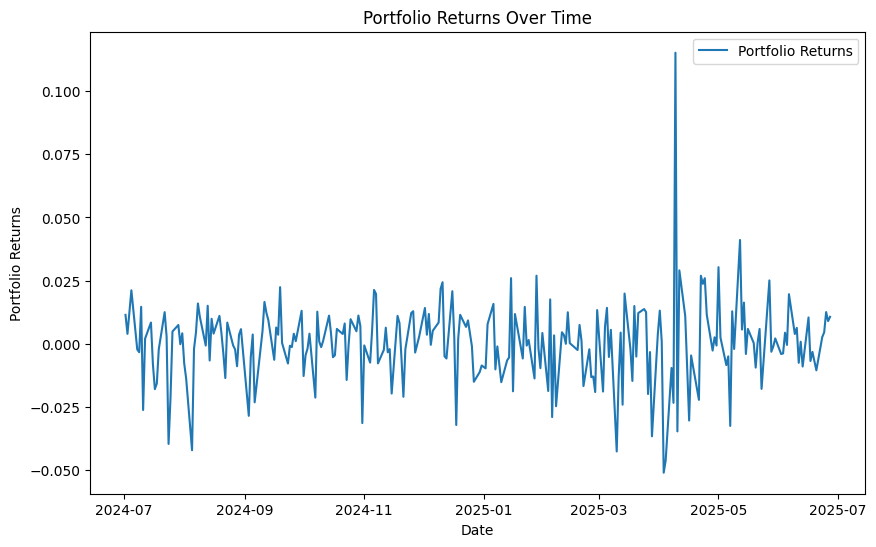

In [9]:

plot_portfolio_returns(port_daily_return)


## Step 7: Beta Coefficients

We calculate the beta of each stock relative to a benchmark (e.g., S&P 500).
Beta measures the stock's sensitivity to market movements and is used to build a beta-weighted portfolio.

In [10]:

benchmark_daily_returns = get_benchmark_data(start_date, end_date)
betas = calculate_beta(daily_returns, benchmark_daily_returns)
betas


[*********************100%***********************]  1 of 1 completed


GOOGL    1.055801
MSFT     0.970240
AAPL     1.236334
Name: Beta, dtype: float64

## Step 8: Beta Weights

Using the beta values, we compute weights inversely proportional to beta.
This strategy gives lower weights to volatile stocks and higher weights to more stable ones.

In [11]:

beta_weight = calculate_beta_weights(betas)
beta_weight


GOOGL    0.196107
MSFT    -0.100683
AAPL     0.904576
Name: Weight, dtype: float64

## Step 9: Risk Parity Weights

We compute risk parity weights so that each asset contributes equally to the overall portfolio risk.
This method is commonly used to build balanced portfolios where no single asset dominates the risk.

In [12]:

risk_parity_weights = calculate_risk_parity_weights(daily_returns)
risk_parity_weights


Ticker
GOOGL    0.306958
MSFT     0.386254
AAPL     0.306788
dtype: float64

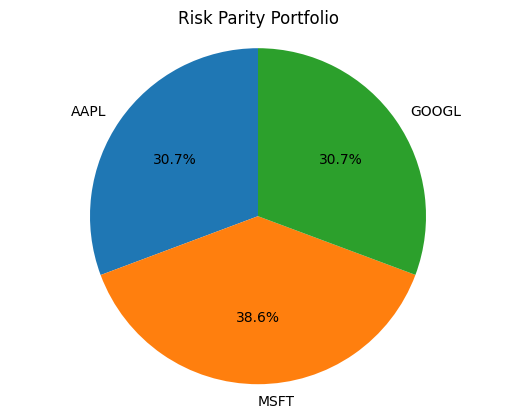

In [13]:

create_pie_chart(risk_parity_weights, tickers, 'Risk Parity Portfolio')


## Step 10: Analyze Strategies

We initialize a PortfolioAnalyzer object which is used to simulate and evaluate different portfolio strategies.
It helps us analyze the return evolution and total gains for various allocation techniques over a fixed time period.

In [14]:

analyzer = PortfolioAnalyzer(tickers)


### Analyze User Strategy

We simulate how the portfolio would have performed over the last 10 years using the original user-defined weights.
This serves as the baseline to compare other strategies.

[*********************100%***********************]  3 of 3 completed
d:\WORK_DIRECTORY\Roboport\analysis\portfolio_analyzer.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_return = (portfolio_value['Profit Close'][-1]/portfolio_value['Profit Close'][0])-1


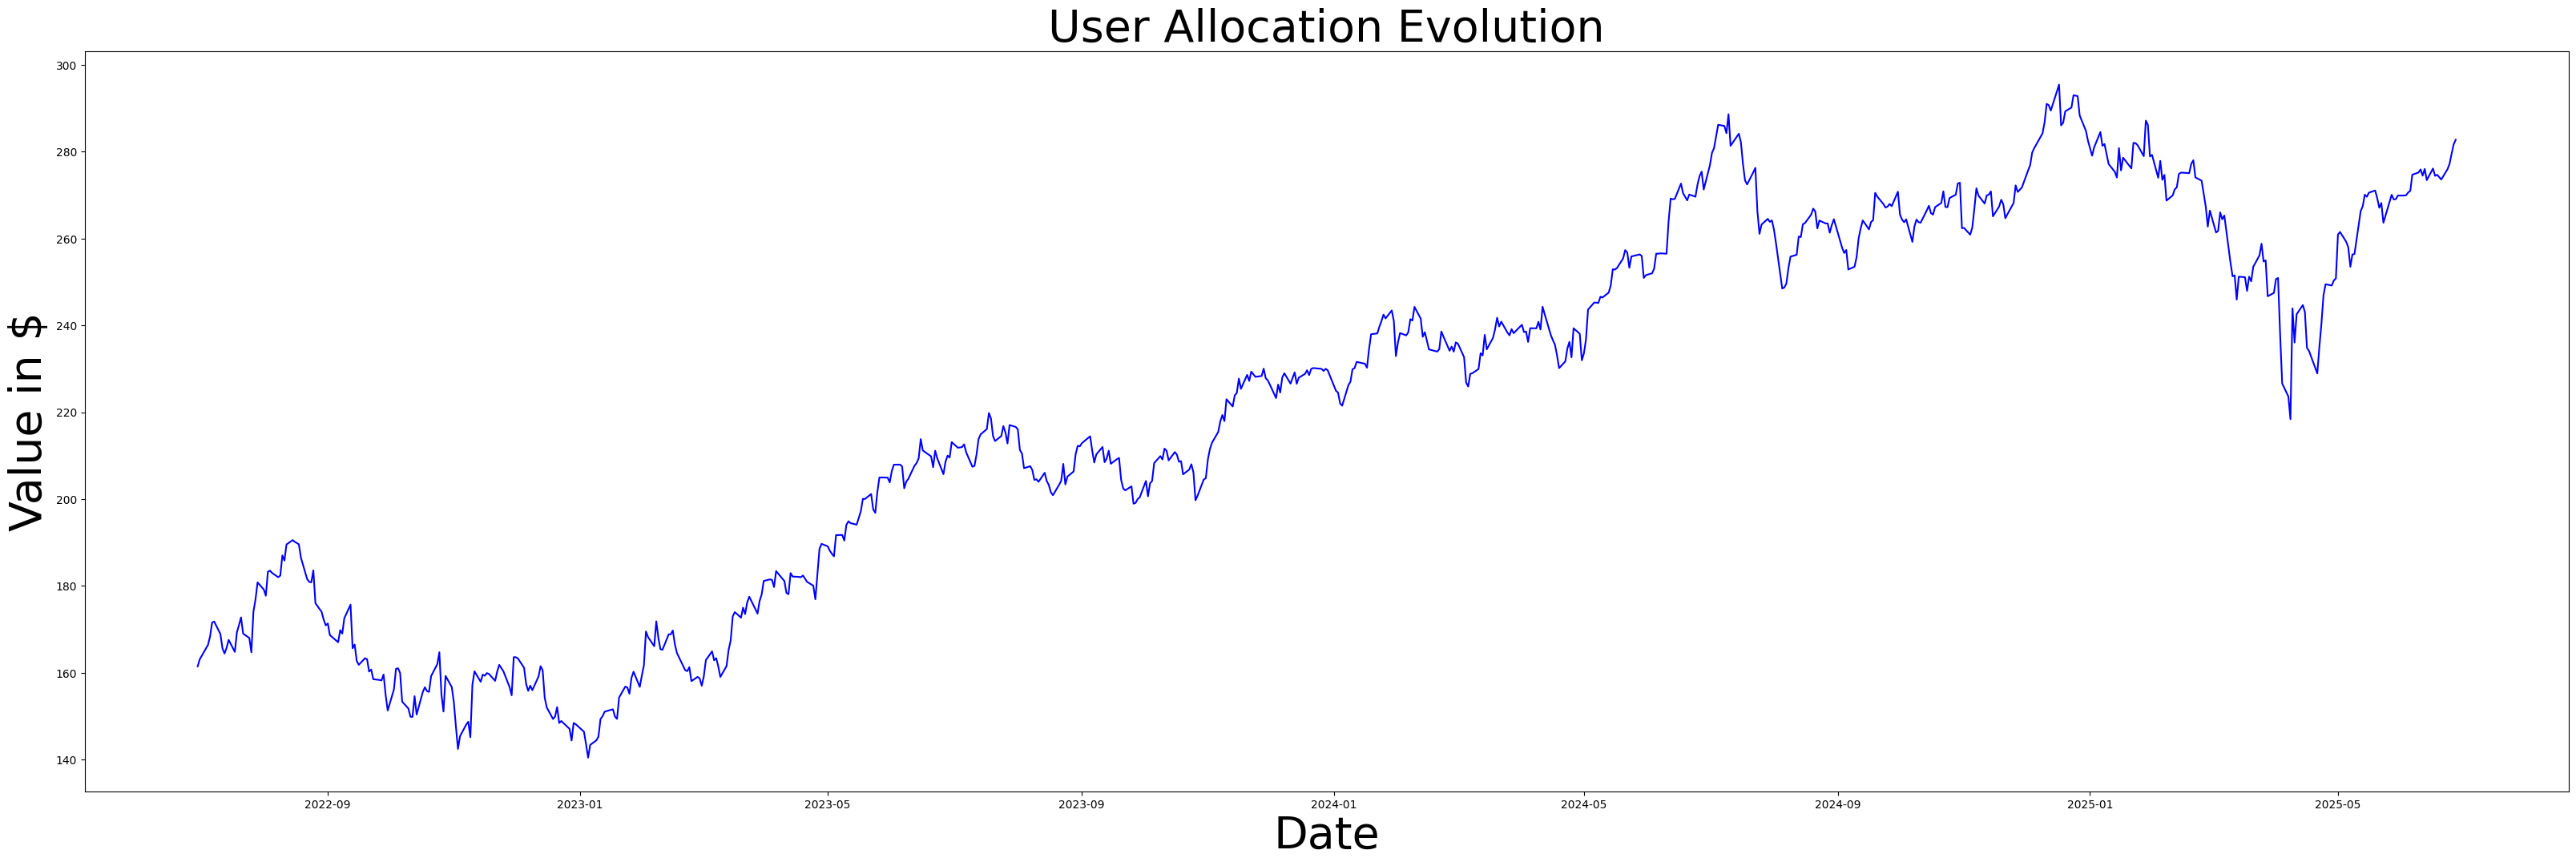

Total Return: 75.13%


In [15]:

user_value, user_return = analyzer.analyze_strategy('User', weights, PORTFOLIO_EVOLUTION_YEARS)
plot_portfolio_evolution(user_value, "User Allocation Evolution")
print(f"Total Return: {user_return:.2%}")


### Analyze Risk Parity Strategy

We evaluate how a risk parity-weighted portfolio would perform over time.
Risk parity aims for more diversified risk allocation and often yields more stable returns.

[*********************100%***********************]  3 of 3 completed
d:\WORK_DIRECTORY\Roboport\analysis\portfolio_analyzer.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_return = (portfolio_value['Profit Close'][-1]/portfolio_value['Profit Close'][0])-1


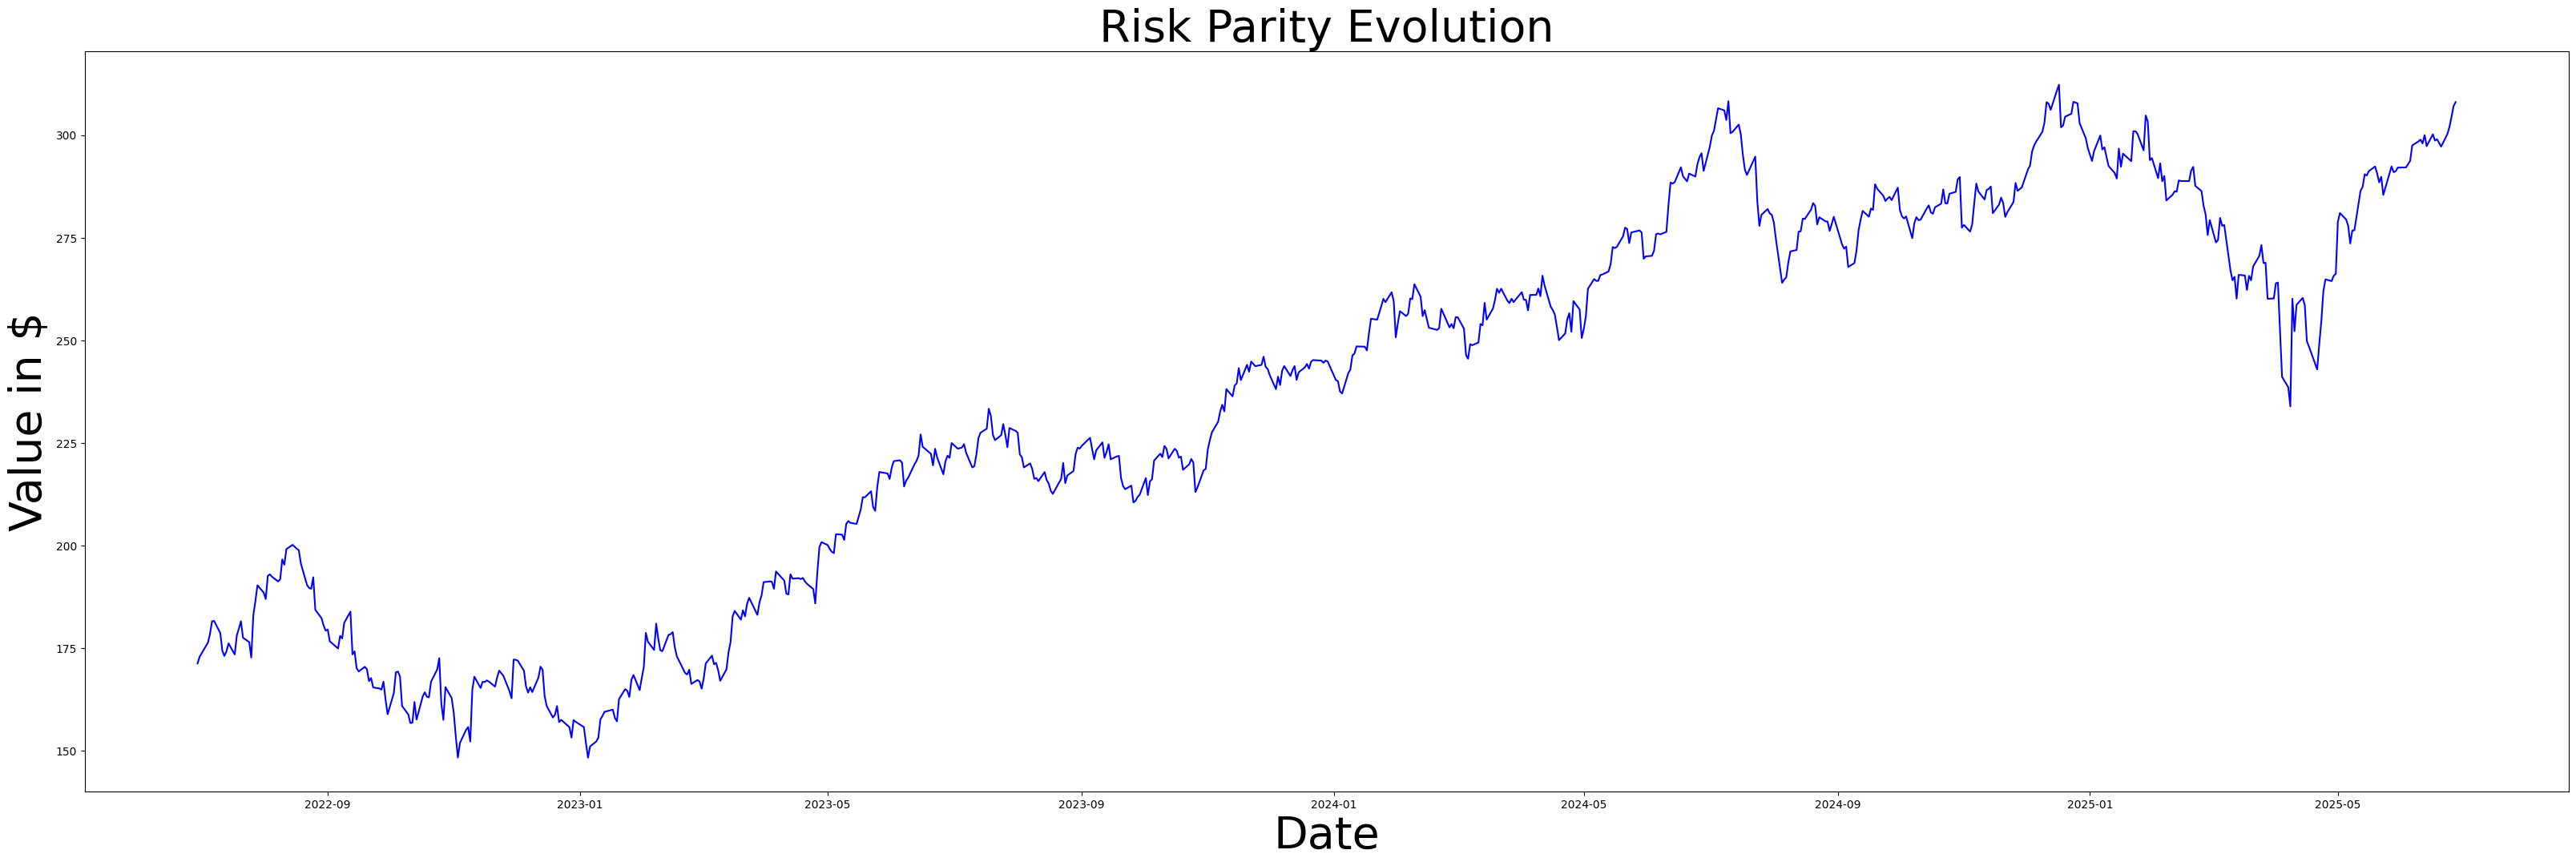

Total Return: 79.85%


In [16]:

rp_value, rp_return = analyzer.analyze_strategy('Risk Parity', risk_parity_weights, PORTFOLIO_EVOLUTION_YEARS)
plot_portfolio_evolution(rp_value, "Risk Parity Evolution")
print(f"Total Return: {rp_return:.2%}")


### Analyze Beta Weight Strategy

We test the beta-weighted strategy where less weight is given to stocks with high volatility.
This can result in a more stable portfolio that is less sensitive to market swings.

[*********************100%***********************]  3 of 3 completed
d:\WORK_DIRECTORY\Roboport\analysis\portfolio_analyzer.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_return = (portfolio_value['Profit Close'][-1]/portfolio_value['Profit Close'][0])-1


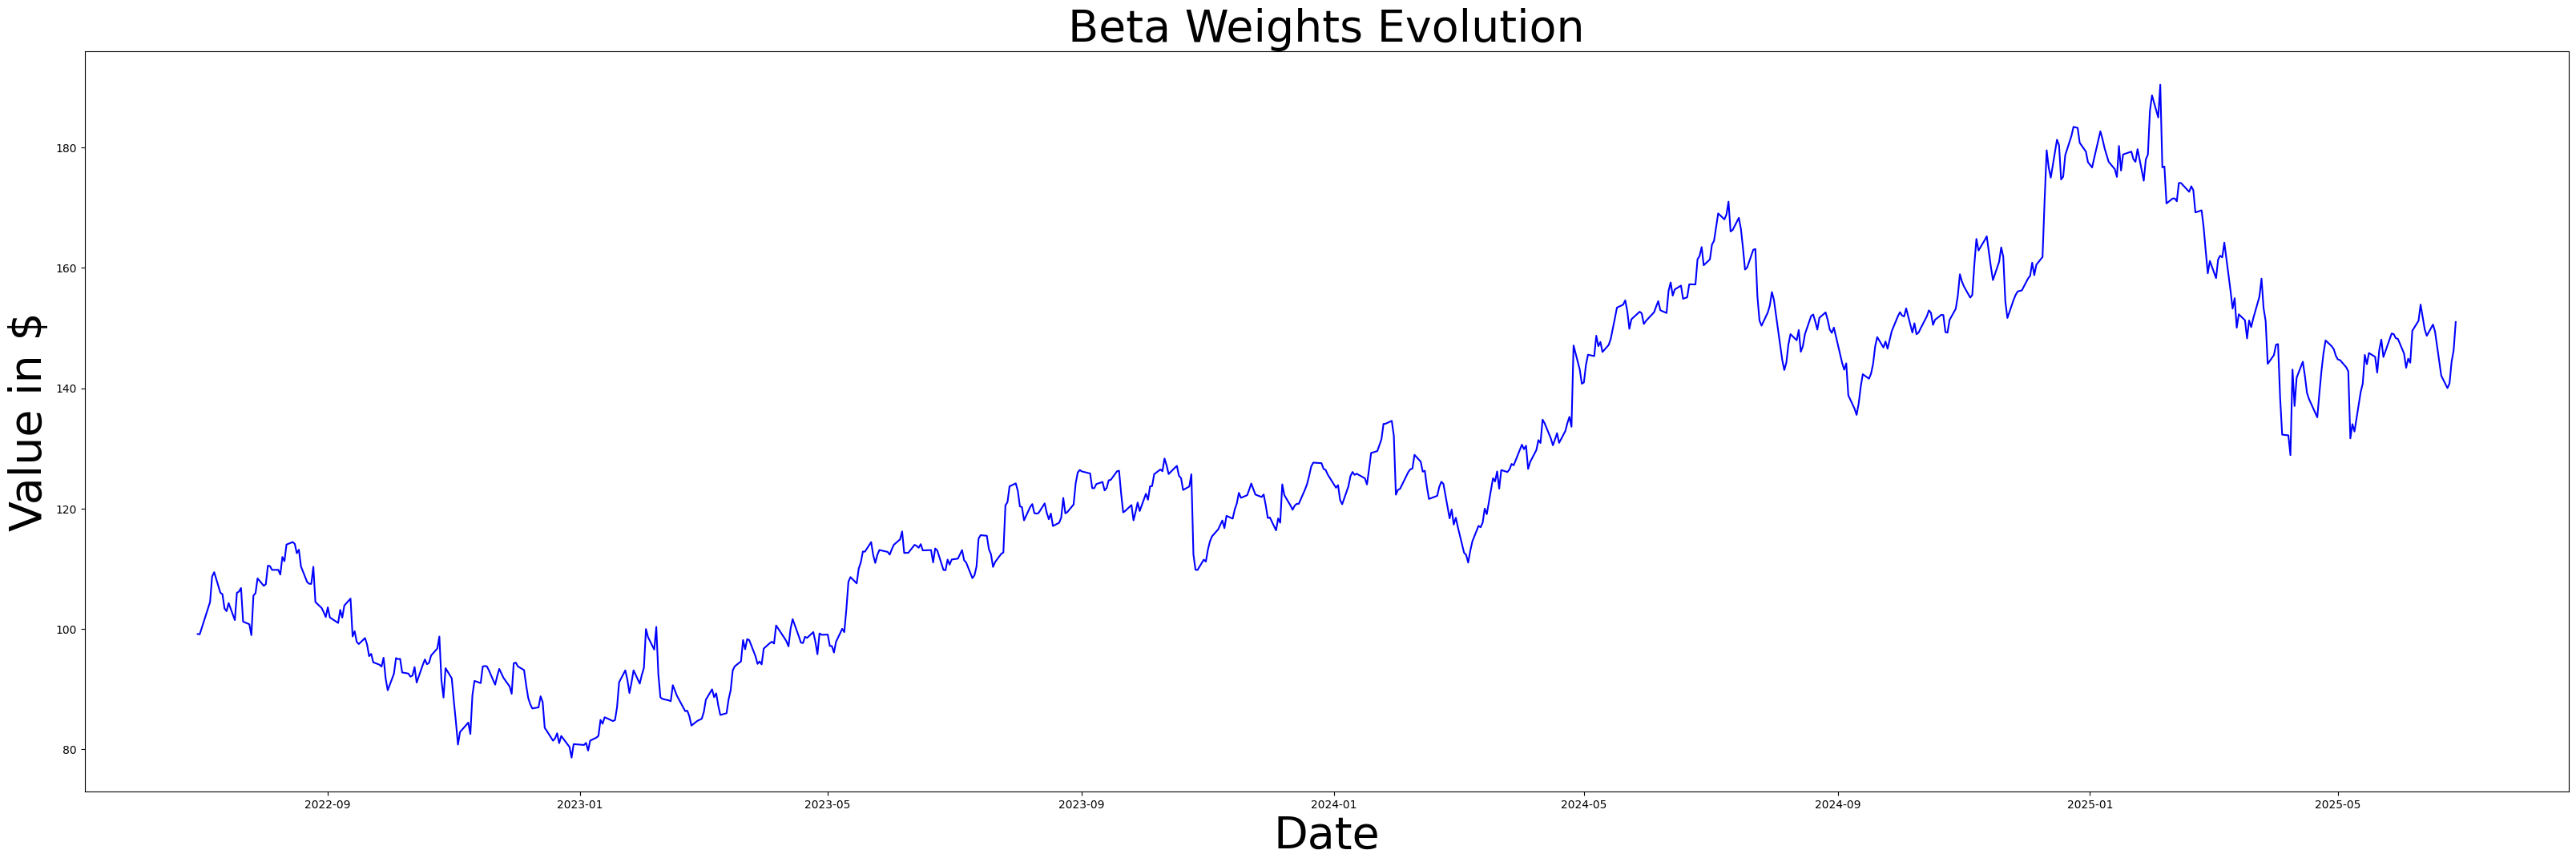

Total Return: 52.29%


In [17]:

beta_value, beta_return = analyzer.analyze_strategy('Beta', beta_weight, PORTFOLIO_EVOLUTION_YEARS)
plot_portfolio_evolution(beta_value, "Beta Weights Evolution")
print(f"Total Return: {beta_return:.2%}")


## Step 11: Sharpe Ratio Optimization

We run a simulation to generate random portfolio weights and compute the Sharpe Ratio (return/risk) for each.
The portfolio with the highest Sharpe Ratio is selected as optimal under this criterion.

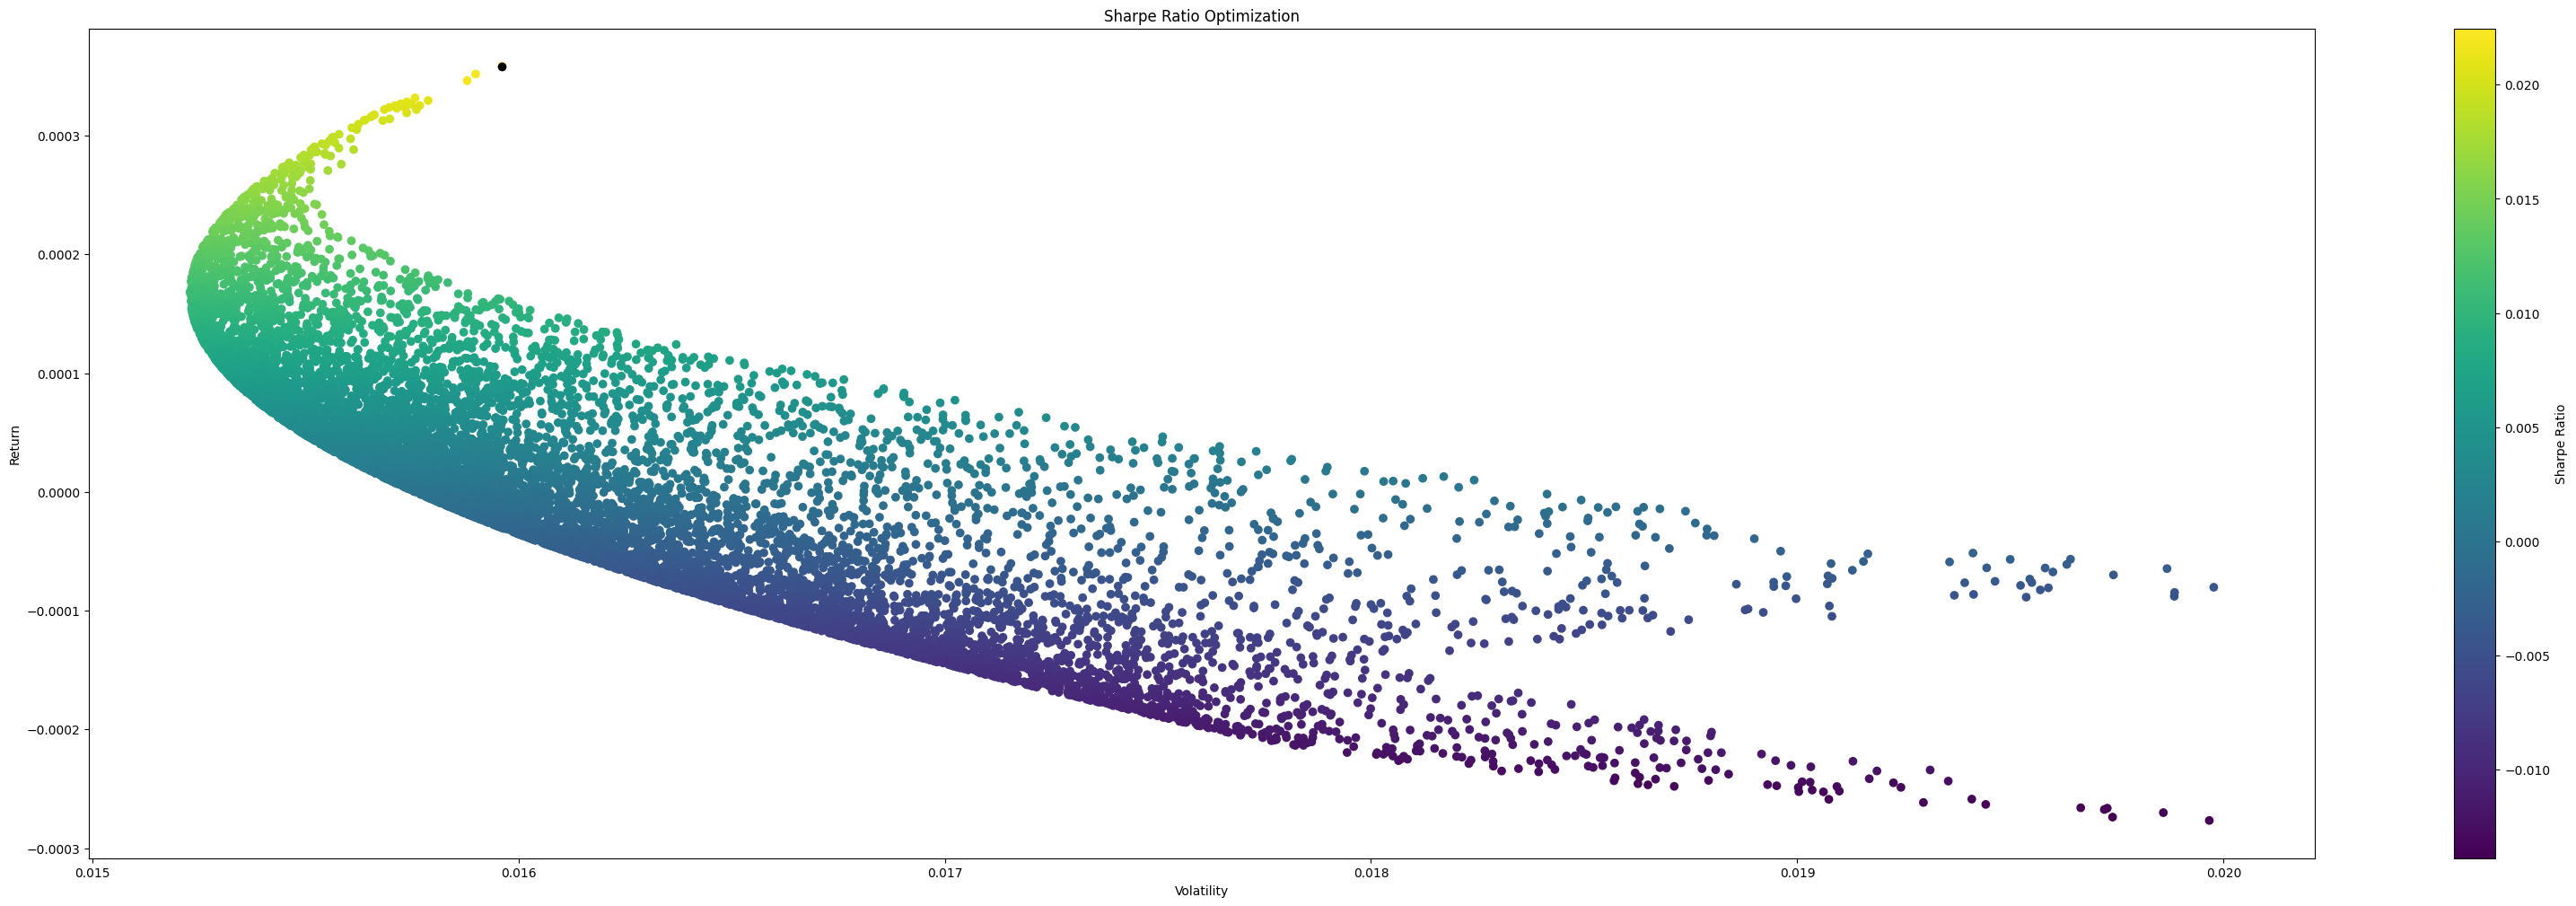

In [18]:

sharpe_data = calculate_sharpe_ratio_optimization(prices, num_tickers)
plot_sharpe_ratio_scatter(
    sharpe_data['test_volatility'], 
    sharpe_data['test_return'], 
    sharpe_data['sharpratio'], 
    sharpe_data['max_sharpratio']
)


[*********************100%***********************]  3 of 3 completed
d:\WORK_DIRECTORY\Roboport\analysis\portfolio_analyzer.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_return = (portfolio_value['Profit Close'][-1]/portfolio_value['Profit Close'][0])-1


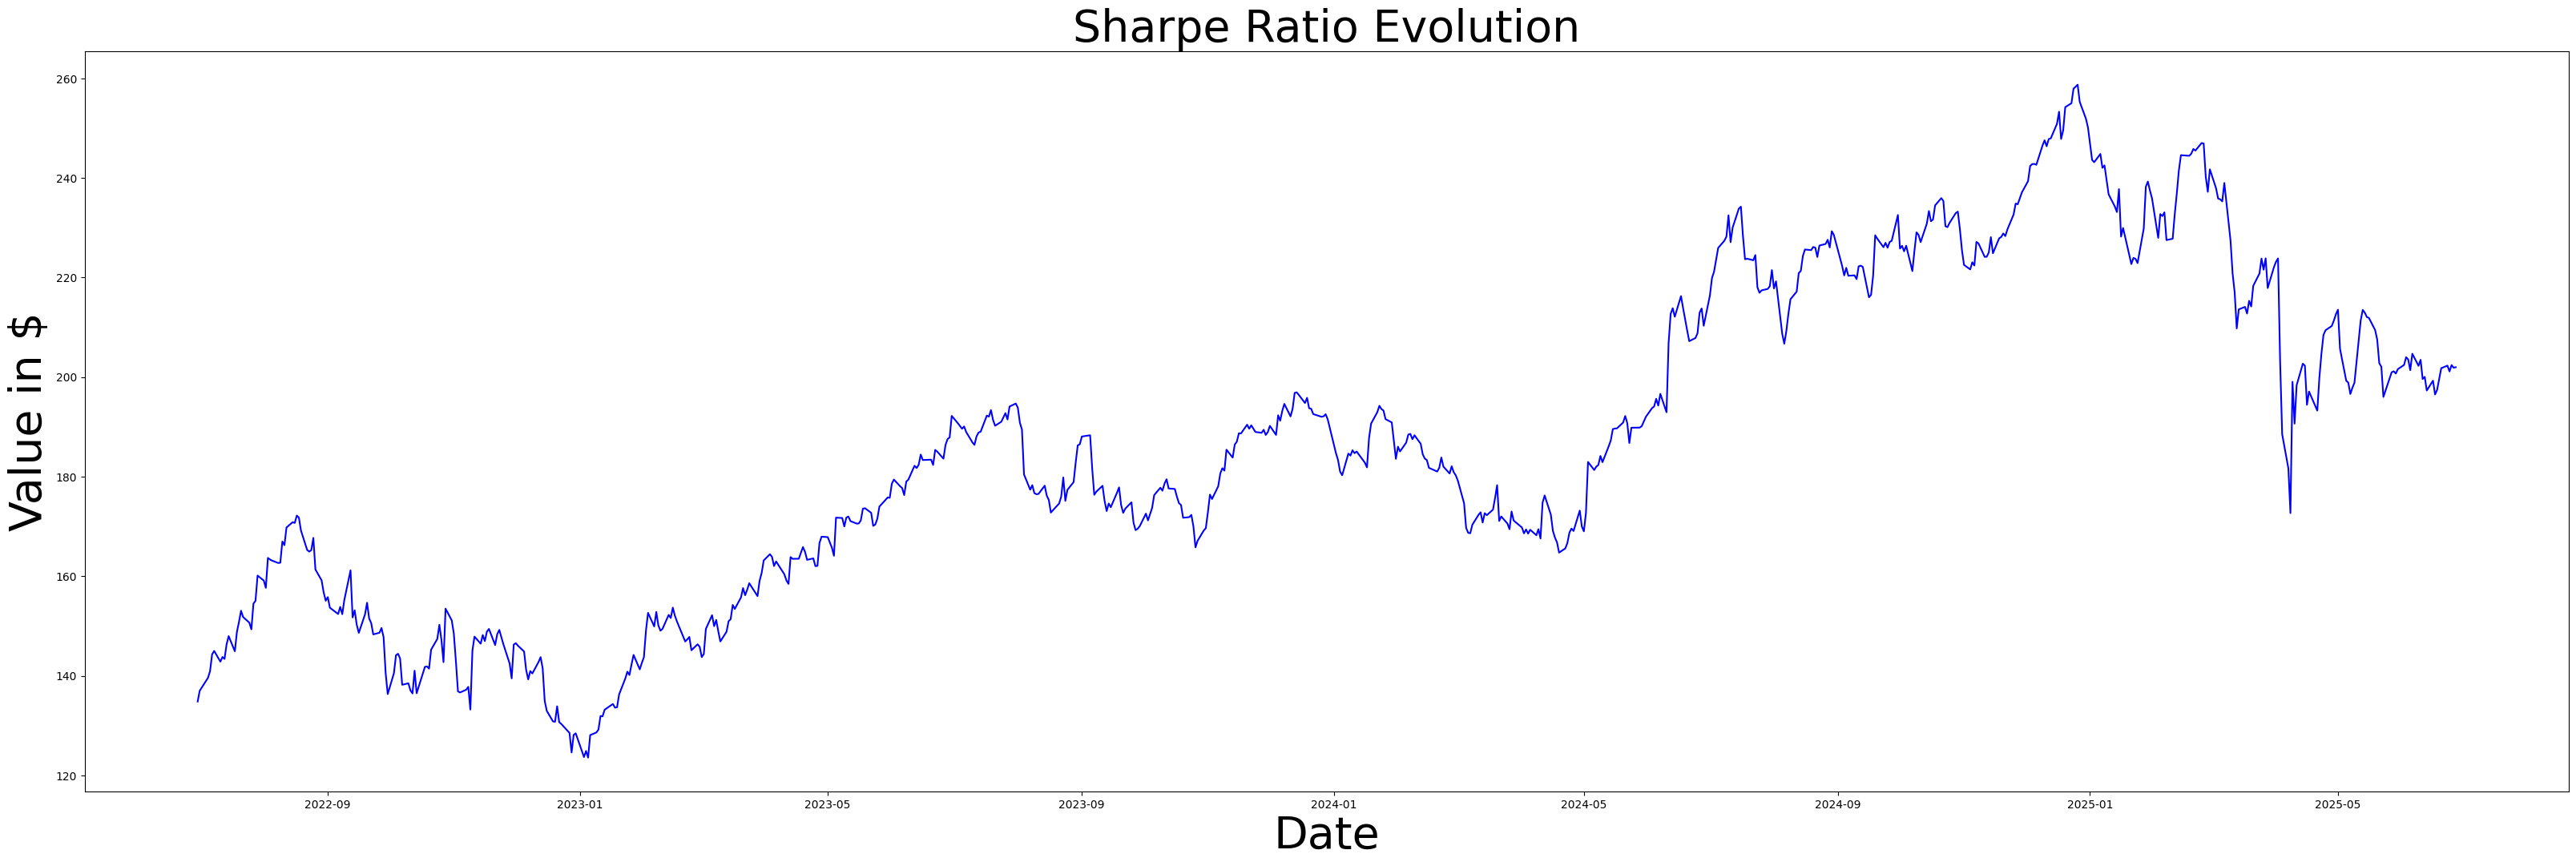

Total Return: 49.79%


In [19]:

sr_value, sr_return = analyzer.analyze_strategy('Sharp Ratio', sharpe_data['sharpratio_weight'], PORTFOLIO_EVOLUTION_YEARS)
plot_portfolio_evolution(sr_value, "Sharpe Ratio Evolution")
print(f"Total Return: {sr_return:.2%}")


## Step 12: Markowitz Optimization

We use Modern Portfolio Theory to calculate the 'efficient frontier' and determine the portfolio with the maximum Sharpe ratio.
This method helps identify the best trade-off between risk and return.

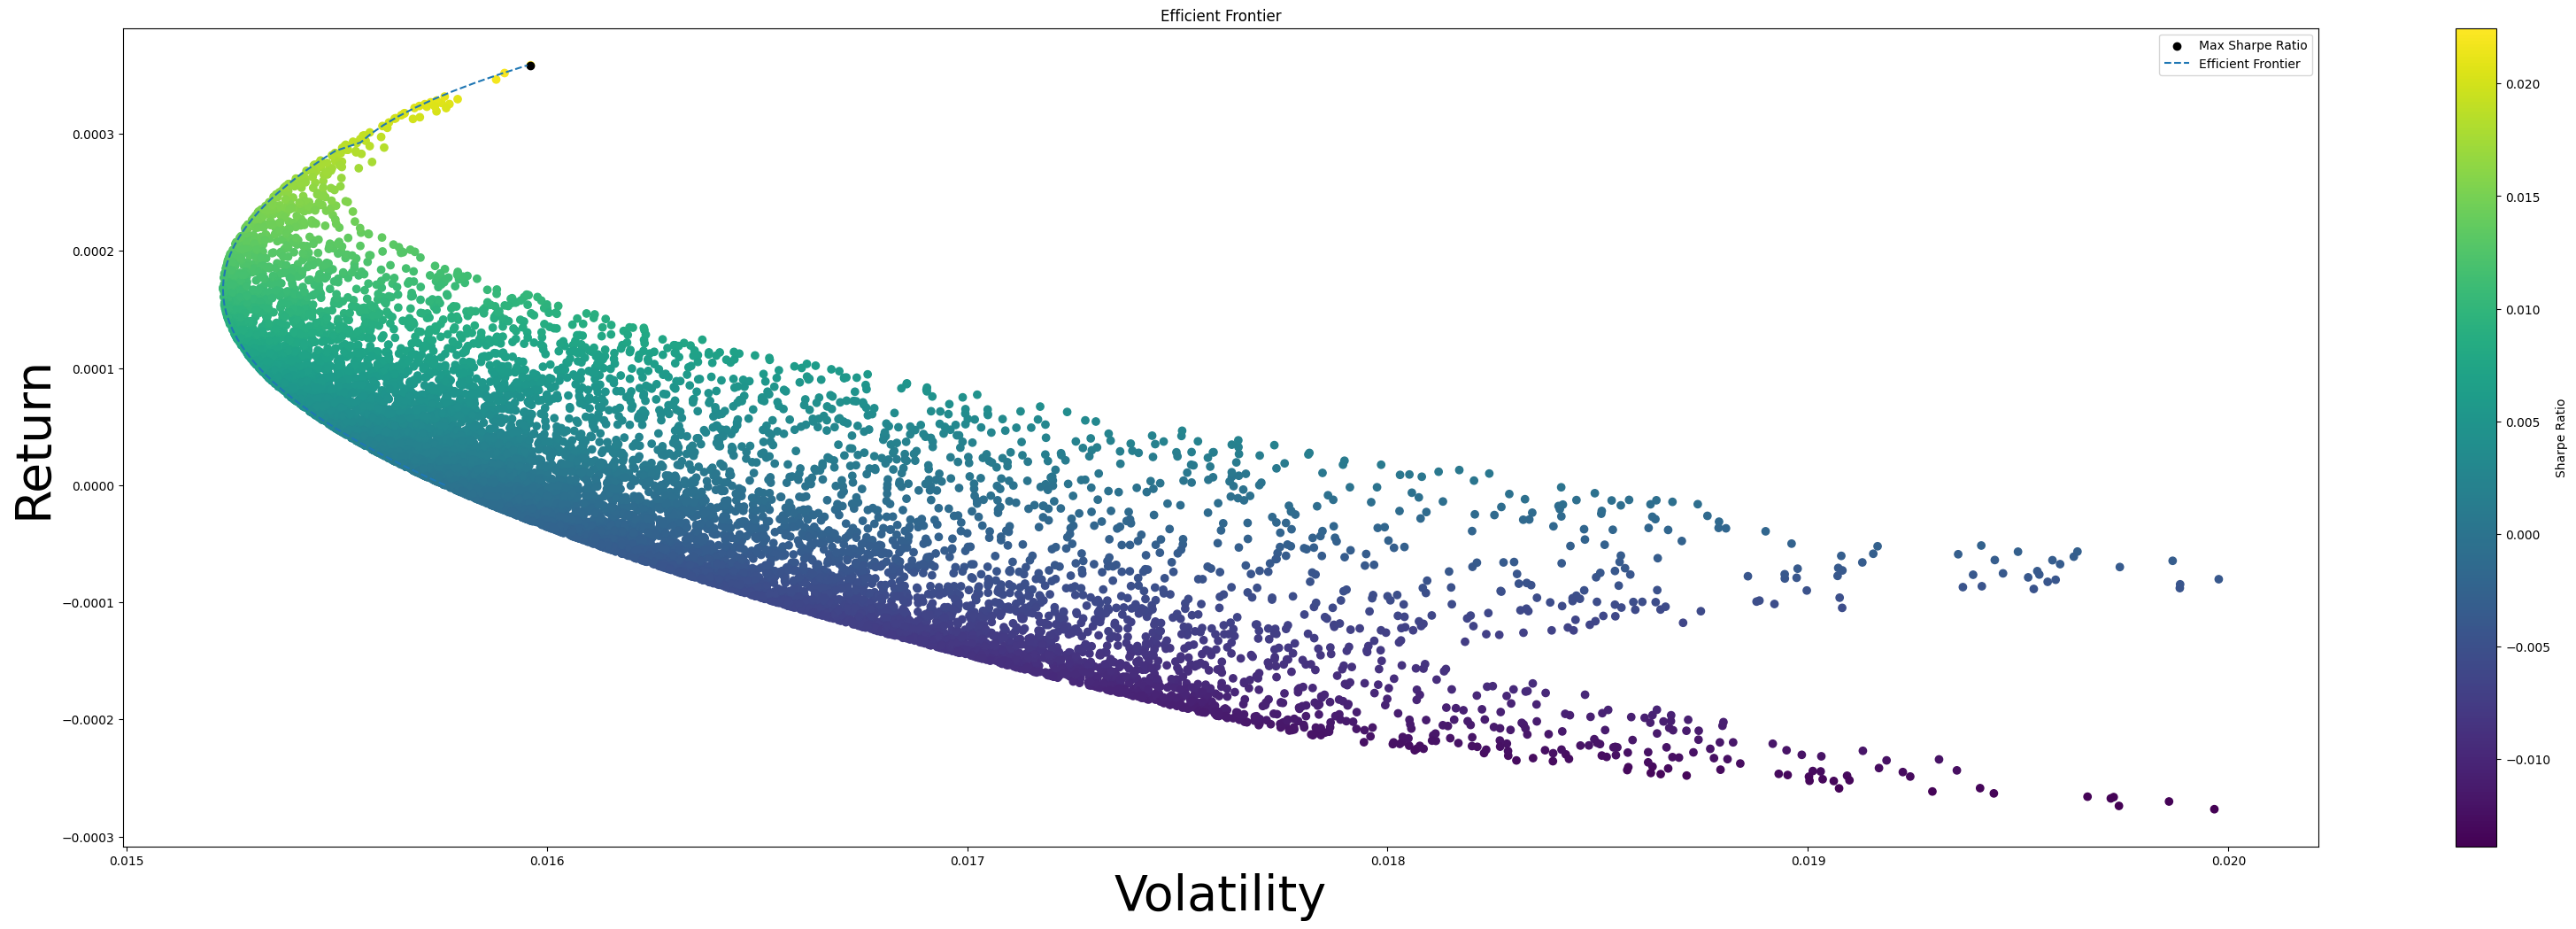

In [20]:

markowitz_data = calculate_markowitz_optimization(
    sharpe_data['meanlog'], 
    sharpe_data['sigma'], 
    num_tickers, 
    sharpe_data['test_return']
)
plot_efficient_frontier(
    sharpe_data['test_volatility'],
    sharpe_data['test_return'],
    sharpe_data['sharpratio'],
    sharpe_data['max_sharpratio'],
    markowitz_data['optimal_volatility'],
    markowitz_data['returns']
)


[*********************100%***********************]  3 of 3 completed
d:\WORK_DIRECTORY\Roboport\analysis\portfolio_analyzer.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_return = (portfolio_value['Profit Close'][-1]/portfolio_value['Profit Close'][0])-1


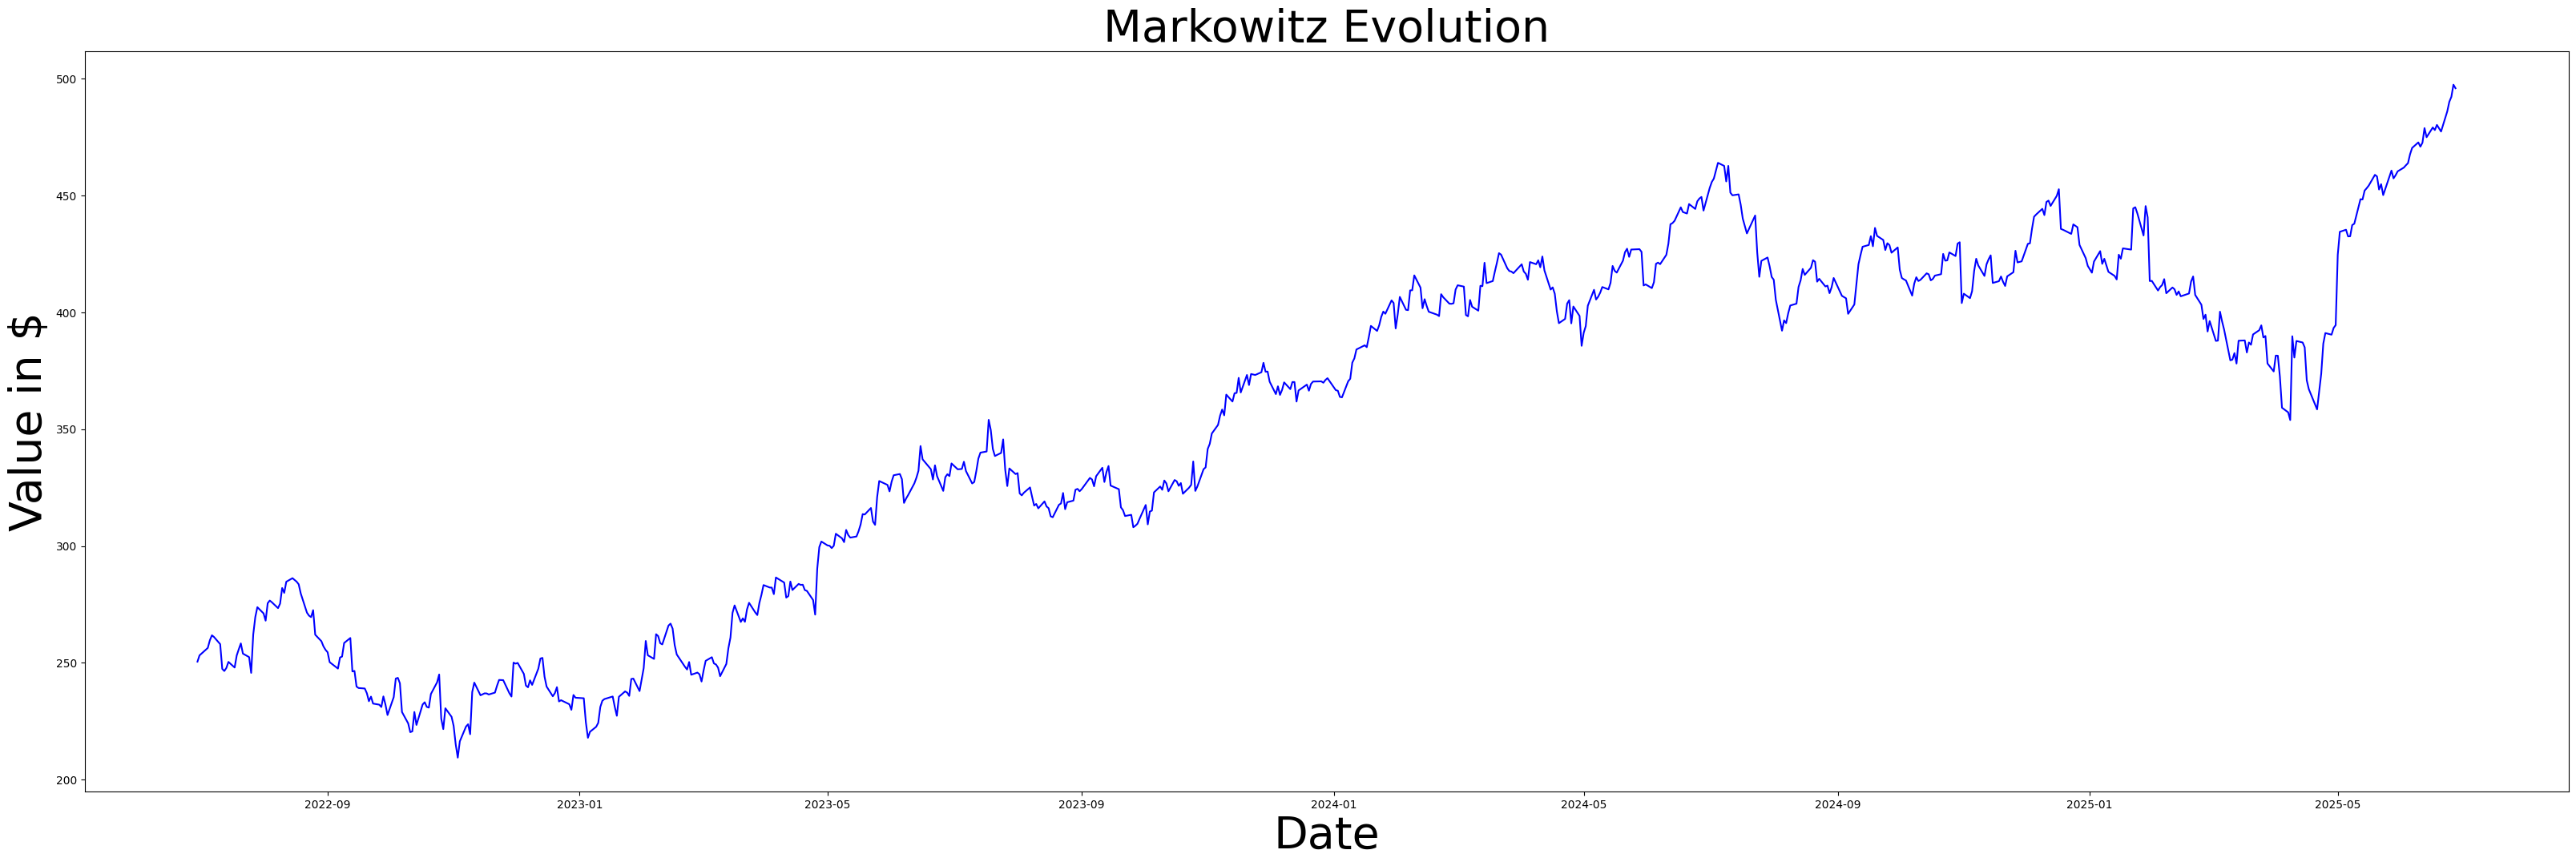

Total Return: 98.00%


In [21]:

markowitz_value, markowitz_return = analyzer.analyze_strategy('Markowitz', markowitz_data['optimal_weight'].x, PORTFOLIO_EVOLUTION_YEARS)
plot_portfolio_evolution(markowitz_value, "Markowitz Evolution")
print(f"Total Return: {markowitz_return:.2%}")


## Step 13: Final Strategy Recommendation

We compare the total returns from all strategies and select the one with the highest return.
The corresponding allocation and visualizations are displayed as a recommendation to the user.

In [22]:

best_strategy, best_return = analyzer.get_best_strategy()
print(f"Best Strategy: {best_strategy} with return {best_return:.2%}")


Best Strategy: Markowitz with return 98.00%


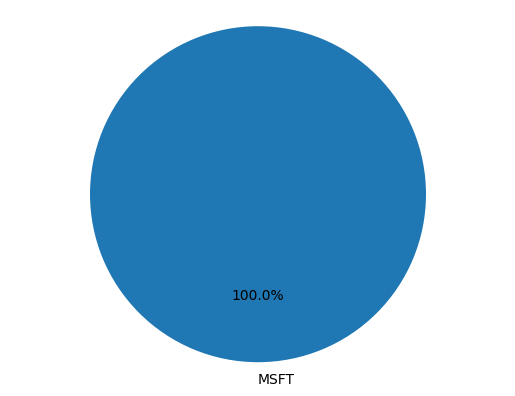

,Key,Value
0,AAPL,1.526557e-16
1,MSFT,1.000000e+00
2,GOOGL,0.000000e+00


In [23]:

# Display corresponding pie chart and weights
if best_strategy == 'Risk Parity':
    create_pie_chart(risk_parity_weights, tickers)
    df = analyzer.create_recommendation_dataframe(best_strategy, risk_parity_weights)
elif best_strategy == 'Markowitz':
    create_pie_chart(markowitz_data['optimal_weight'].x, tickers)
    df = analyzer.create_recommendation_dataframe(best_strategy, markowitz_data['optimal_weight'].x)
elif best_strategy == 'User':
    create_pie_chart(weights, tickers)
    df = analyzer.create_recommendation_dataframe(best_strategy, weights)
elif best_strategy == 'Beta':
    create_pie_chart(beta_weight, tickers)
    df = analyzer.create_recommendation_dataframe(best_strategy, beta_weight)
elif best_strategy == 'Sharp Ratio':
    create_pie_chart(sharpe_data['sharpratio_weight'], tickers)
    df = analyzer.create_recommendation_dataframe(best_strategy, sharpe_data['sharpratio_weight'])

df
